In [1]:
import numpy as np
import pandas as pd
import string
import re
import nltk

import matplotlib.pyplot as plt 
import seaborn as sns 

from nltk.tokenize import word_tokenize                                                                # type: ignore
from nltk.stem import WordNetLemmatizer                                                                # type: ignore
from nltk.corpus import stopwords                                                                     # type: ignore
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')                                                                              
from imblearn.over_sampling import RandomOverSampler                                                  # type: ignore
from sklearn.model_selection import train_test_split                                                  # type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer                                             # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences                                     # type: ignore

from keras.layers import Embedding                                                                   # type: ignore
embedding_layer = Embedding(1000, 64)
from keras.models import Sequential                                                                   # type: ignore
from keras import layers                                                                              # type: ignore
from keras import backend as K                                                                        # type: ignore
from keras.callbacks import ModelCheckpoint                                                           # type: ignore



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#from keras import regularizers
#from nltk.tokenize import word_tokenize
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences


In [3]:
#df=pd.read_csv(r"C:\Users\Ashwin\Desktop\sentiment\sentimentdataset.csv")

In [2]:
#dataset
df=pd.read_csv(r"C:\Users\Ashwin\Desktop\sentiment\sentimentdataset.csv")
df.shape

(732, 15)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
Unnamed: 0.1,0.000000,366.500000,366.464481,732.000000,211.513936
Unnamed: 0,0.000000,370.500000,369.740437,736.000000,212.428936
Retweets,5.000000,22.000000,21.508197,40.000000,7.061286
Likes,10.000000,43.000000,42.901639,80.000000,14.089848
Year,2010.000000,2021.000000,2020.471311,2023.000000,2.802285
Month,1.000000,6.000000,6.122951,12.000000,3.411763
Day,1.000000,15.000000,15.497268,31.000000,8.474553
Hour,0.000000,16.000000,15.521858,23.000000,4.113414


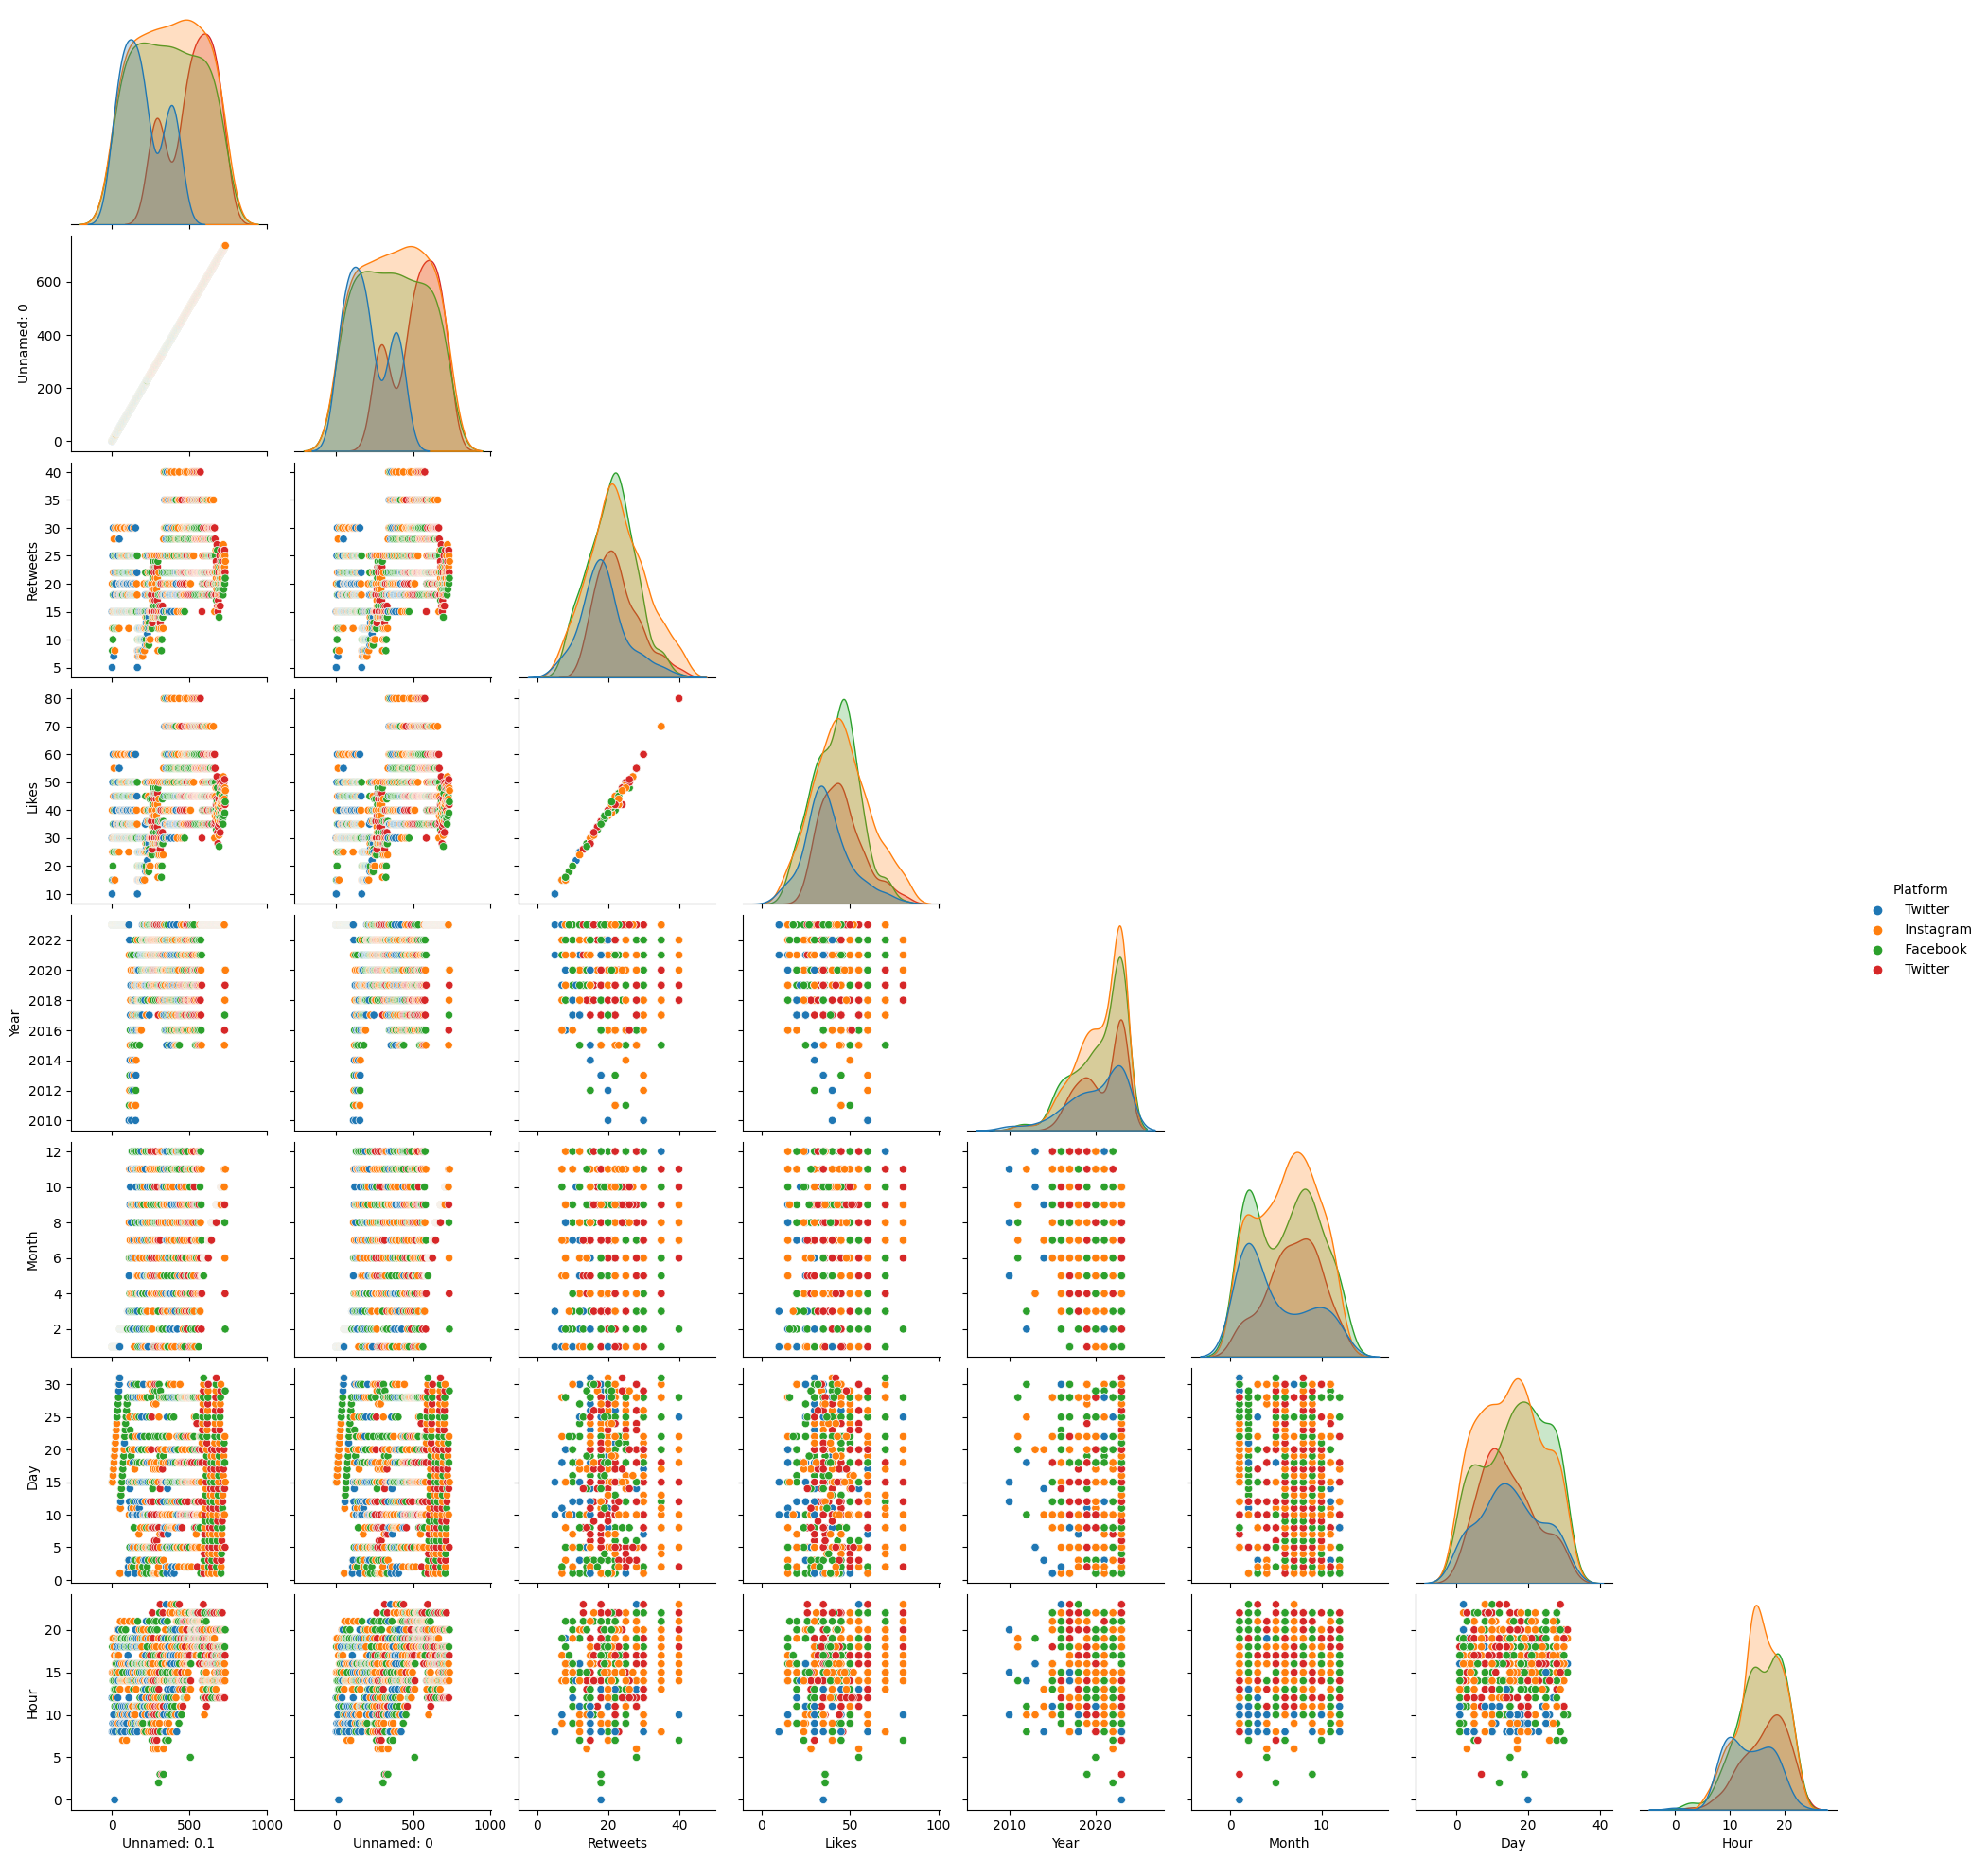

In [14]:
sns.pairplot(df, hue = 'Platform',corner=True )

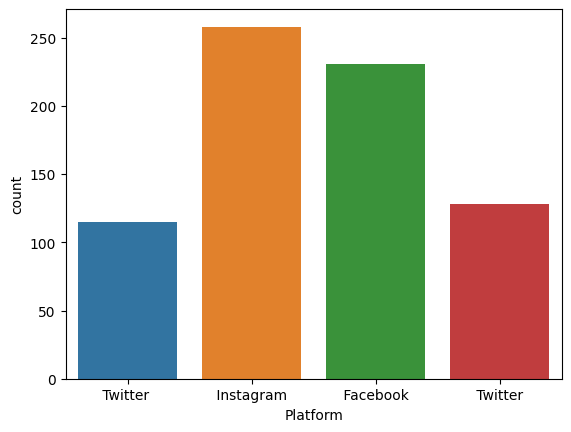

In [5]:
sns.countplot(x = 'Platform' , data = df)
plt.show()

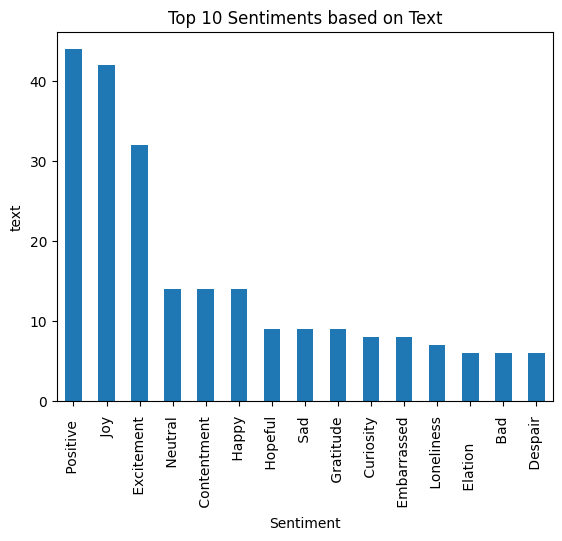

In [21]:
df['Sentiment'].value_counts().nlargest(15).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('text')
plt.show()

In [7]:
df['Text']

0       Enjoying a beautiful day at the park!        ...
1       Traffic was terrible this morning.           ...
2       Just finished an amazing workout! 💪          ...
3       Excited about the upcoming weekend getaway!  ...
4       Trying out a new recipe for dinner tonight.  ...
                             ...                        
727    Collaborating on a science project that receiv...
728    Attending a surprise birthday party organized ...
729    Successfully fundraising for a school charity ...
730    Participating in a multicultural festival, cel...
731    Organizing a virtual talent show during challe...
Name: Text, Length: 732, dtype: object

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def count_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return len(emoji_pattern.findall(text))
total_emoji_count = df['Text'].apply(count_emojis).sum()
total_emoji_count

11

Not a lot of emojis for a dataset containing 732 rows, so we can just ignore them. they wont affect the overall results.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashwin\AppData\Roaming\nltk_data...


True

In [14]:

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text_and_convert_emojis(text):
    # Convert emojis to their text descriptions
    text = emoji.demojize(text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop-words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Detokenize to reconstruct text
    text = ' '.join(words)
    return text
df['Cleaned_Text'] = df['Text'].apply(clean_text_and_convert_emojis)

display(df[['Text', 'Cleaned_Text']])

,Text,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout flexedbiceps
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight
...,...,...
727,Collaborating on a science project that receiv...,collaborating science project received recogni...
728,Attending a surprise birthday party organized ...,attending surprise birthday party organized fr...
729,Successfully fundraising for a school charity ...,successfully fundraising school charity initia...
730,"Participating in a multicultural festival, cel...",participating multicultural festival celebrati...


In [15]:


max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['Cleaned_Text'])
sequences = tokenizer.texts_to_sequences(df['Cleaned_Text'])
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  305    3  429]
 [   0    0    0 ... 1031 1032  306]
 [   0    0    0 ... 1033  230  430]
 ...
 [   0    0    0 ... 2303  597   65]
 [   0    0    0 ...   25  946  950]
 [   0    0    0 ...  363  426  364]]


In [9]:
df['Sentiment'].unique().shape

(279,)

In [27]:
def categorize_sentiment(sentiment):
    positive_sentiments= ['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration',
                 'Affection', 'Awe', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude',
                 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
                 'Fulfillment', 'Reverence', 'Inspired', 'Confident', 'Blessed', 'Satisfaction',
                 'Blessed', 'Anticipation', 'Inspiration', 'Motivation', 'Satisfaction',
                 'Accomplishment', 'Wonderment', 'Optimism', 'Pride', 'Hopeful', 'Proud',
                 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited',
                 'Confident', 'Mindfulness', 'DreamChaser', 'Whimsy', 'Harmony', 'Creativity',
                 'Radiance', 'Rejuvenation', 'ArtisticBurst', 'Adventure', 'Euphoria', 'Melodic',
                 'FestiveJoy', 'InnerJourney', 'Freedom', 'Dazzle', 'ArtisticBurst', 'CulinaryOdyssey',
                 'Euphoria', 'Resilience', 'Immersion', 'Spark', 'Marvel', 'Heartwarming', 'Adventure',
                 'Heartwarming', 'Breakthrough', 'Harmony', 'Joy in Baking', 'Envisioning History',
                 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic',
                 "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity',
                 "Ocean's Freedom", 'Whispers of the Past', 'Boredom', 'Indifference', 'Disgust',
                 'Positive', 'Embarrassed', 'Mischievous', 'Happy']
    negative_sentiments = ['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Bitter', 'Confusion',
                 'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration',
                 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Betrayal',
                 'Suffering', 'EmotionalStorm', 'Isolation', 'Disappointment', 'LostLove', 'Exhaustion',
                 'Sorrow', 'Darkness', 'Desperation', 'Ruins', 'Desolation', 'Regret', 'Grief',
                 'Heartbreak', 'Betrayal', 'Sorrow', 'Loss', 'Heartache', 'Solitude', 'Fearful',
                 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious',
                 'Dismissive', 'Resentment', 'Heartbreak', 'Disappointment', 'Sorrow', 'Loss',
                 'Heartache', 'Sad']
    if sentiment.strip() in positive_sentiments:
        return 'Positive'
    elif sentiment.strip() in negative_sentiments:
        return 'Negative'
    else:
        return 'Neutral'
    

In [98]:

X = df[['Cleaned_Text']]  
y = df['Sentiment_Category']  

# Apply RandomOverSampler to balance classes based on sentiment_category
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=['Cleaned_Text'])
df_resampled['Sentiment_Category'] = y_resampled

# Apply one-hot encoding to the balanced dataset
df_encoded = pd.get_dummies(df_resampled, columns=['Sentiment_Category'], drop_first=False)

# Define X (features) and y (one-hot encoded target)
X_encoded = df_encoded['Cleaned_Text']
y_encoded = df_encoded[['Sentiment_Category_Negative', 'Sentiment_Category_Neutral', 'Sentiment_Category_Positive']]

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Displaying the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (888,)
X_test shape: (222,)
y_train shape: (888, 3)
y_test shape: (222, 3)


In [75]:


# Initialize a tokenizer
tokenizer = Tokenizer(num_words=10000) 

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for uniform length
max_len = 100  
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [82]:


model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train_padded, y_train, epochs=70,validation_data=(X_test_padded, y_test),callbacks=[checkpoint2])

Epoch 1/70
27/28 [===========================>..] - ETA: 0s - loss: 1.0961 - accuracy: 0.3715
Epoch 1: val_accuracy improved from -inf to 0.38739, saving model to best_model2.hdf5
28/28 [==============================] - 5s 57ms/step - loss: 1.0959 - accuracy: 0.3739 - val_loss: 1.0921 - val_accuracy: 0.3874
Epoch 2/70
 5/28 [====>.........................] - ETA: 0s - loss: 1.0890 - accuracy: 0.4187

C:\Users\Ashwin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/28 [===========================>..] - ETA: 0s - loss: 1.0807 - accuracy: 0.5162
Epoch 2: val_accuracy improved from 0.38739 to 0.72523, saving model to best_model2.hdf5
28/28 [==============================] - 1s 28ms/step - loss: 1.0807 - accuracy: 0.5135 - val_loss: 1.0705 - val_accuracy: 0.7252
Epoch 3/70
28/28 [==============================] - ETA: 0s - loss: 1.0374 - accuracy: 0.6599
Epoch 3: val_accuracy did not improve from 0.72523
28/28 [==============================] - 1s 27ms/step - loss: 1.0374 - accuracy: 0.6599 - val_loss: 1.0132 - val_accuracy: 0.7252
Epoch 4/70
26/28 [==========================>...] - ETA: 0s - loss: 0.9499 - accuracy: 0.7356
Epoch 4: val_accuracy did not improve from 0.72523
28/28 [==============================] - 1s 27ms/step - loss: 0.9450 - accuracy: 0.7421 - val_loss: 0.9328 - val_accuracy: 0.6441
Epoch 5/70
26/28 [==========================>...] - ETA: 0s - loss: 0.8174 - accuracy: 0.7704
Epoch 5: val_accuracy did not improve from 0.72523
28/

7/7 [==============================] - 0s 6ms/step


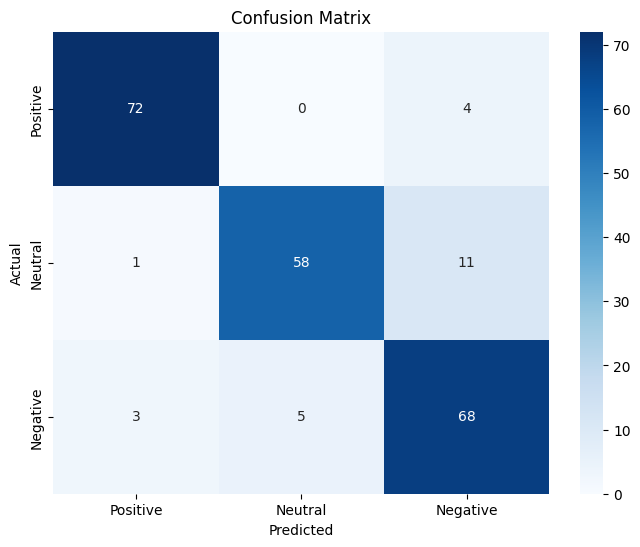

In [107]:

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert one-hot encoded y_test back to categorical labels
y_pred = np.argmax(model2.predict(X_test_padded), axis=-1)
y_true = np.argmax(y_test.to_numpy(), axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 0s 8ms/step


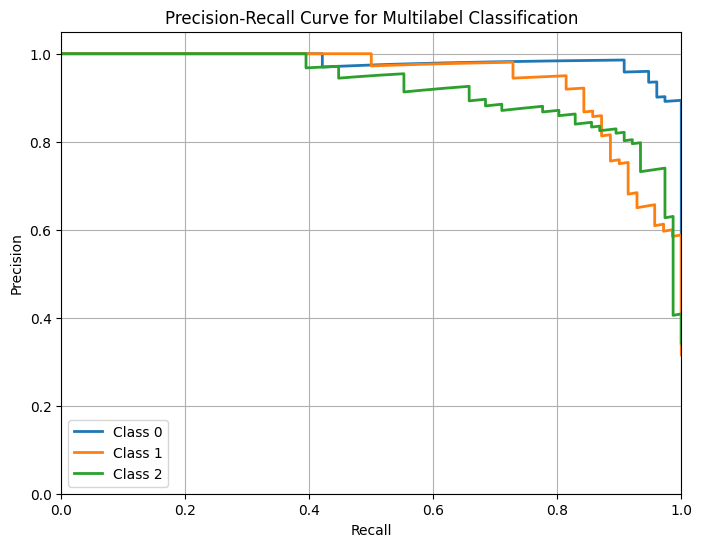

In [108]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()
thresholds = dict()
y_pred=model2.predict(X_test_padded)
y_true=y_test.to_numpy()
num_classes = y_true.shape[1]

for i in range(num_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_true[:, i], y_pred[:, i])

# Plot Precision-Recall curves for each class
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Multilabel Classification')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()